### **Exercise 2**

Give a brief explaination of the Gradient Descent method and motivate the introduction of the Stochastic Gradient Descent (SGD).

#### **Brief Explanation of Gradient Descent**
Gradient Descent is an optimization algorithm used to minimize a loss function by iteratively adjusting the parameters of a model. The key steps are:
1. Compute the gradient of the loss function with respect to the parameters.
2. Update the parameters in the direction of the negative gradient to reduce the loss.

The update rule is:
$$
\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t)
$$
where:
- $\theta_t$: Parameters at iteration $t$,
- $\eta$: Learning rate (step size),
- $\nabla L(\theta_t)$: Gradient of the loss function $L$ with respect to $\theta_t$.

---

#### **Stochastic Gradient Descent (SGD)**
SGD is a variant of Gradient Descent where the gradient is computed on a randomly selected subset (batch) of the data rather than the entire dataset. This reduces computational cost, especially for large datasets, and introduces noise that helps escape local minima.

---

#### **Dataset Setup**
The dataset is defined as follows:
```python
m = 100
noise = 1.0
coeff_exact = np.array([5.0, 1.0])

np.random.seed(0)
X = np.c_[1*np.ones(m), 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)


The Gradient Descent is an iterative optimization technique, usually applied in ML setting, to minimize a function, which is usualy a cost function (such as MSE) by adjusting some parameters of the function

The optimization is performed by correcting the position of the current solution in the hyper-space of parameters by moving in the opposite direction of the gradient of the cost or MSE function, which is the direction of the maximum change of the function (this is way we move in the opposite direction of the gradient).

The step size in the opposite gradient direction is controlled by an hyperparameter, which is called learning rate, and it controls the magnitude of the upate. The learning rate is of paramount importance in order to ensure the convergence of the method.

This iterative approach is performed until a stopping criterion is met (either a maximum number of steps, or if a desired tolerance is met either of the residuals or between consecutive steps)

The Stochastic Gradient Descent (SGD) has been introduced to speed up the computation of the gradient of the cost/MSE function, by computing it only on a random subset of the samples, called mini-batch, instead of computing in on the whole dataset.

There are many ways to choose the subset of samples: only sample can be used, or a minibatch of the whole set (SGD with minibatch)

In [21]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [20]:
m = 100 #number of samples
noise = 1.0 # simulate real world measurement
coeff_exact = np.array([5.0, 1.0]) #These are the exact coefficients [b,w] of the linear model: y= b + w*x, 

np.random.seed(0)
X = np.c_[1*np.ones(m), 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)

In [7]:
X

array([[ 1.        ,  7.4089823 ],
       [ 1.        ,  9.65505645],
       [ 1.        ,  8.13730558],
       [ 1.        ,  7.35592297],
       [ 1.        ,  5.71933979],
       [ 1.        ,  8.71957053],
       [ 1.        ,  5.90742735],
       [ 1.        , 12.03893551],
       [ 1.        , 13.00944727],
       [ 1.        ,  5.1764605 ],
       [ 1.        , 10.68828801],
       [ 1.        ,  7.14008142],
       [ 1.        ,  7.66860157],
       [ 1.        , 12.49555462],
       [ 1.        ,  0.95898679],
       [ 1.        ,  1.17624555],
       [ 1.        ,  0.27294837],
       [ 1.        , 11.24036791],
       [ 1.        , 10.50511614],
       [ 1.        , 11.745164  ],
       [ 1.        , 13.21134762],
       [ 1.        , 10.78864062],
       [ 1.        ,  6.22997139],
       [ 1.        , 10.53714388],
       [ 1.        ,  1.59670475],
       [ 1.        ,  8.63893379],
       [ 1.        ,  1.93526938],
       [ 1.        , 12.75303038],
       [ 1.        ,

In [6]:
X.shape

(100, 2)

### **Dataset Explanation**

1. **`np.c_[1*np.ones(m), 13.5 * np.random.rand(m, 1)]`:**
   - Creates the feature matrix $X$ with two columns:
     - The first column is a constant $1$, which represents the bias term $b$.
     - The second column is a randomly generated feature $x$ scaled by $13.5$. This ensures $x$-values are in the range $[0, 13.5)$.

2. **`X @ coeff_exact`:**
   - Computes the exact linear relationship:
     $$
     y_{\text{exact}} = b + w \cdot x
     $$
   - The result is a vector of size $m$ (100 samples) representing the true $y$-values without noise.

3. **`noise * np.random.randn(m)`:**
   - Adds Gaussian noise to $y_{\text{exact}}$:
     - `np.random.randn(m)` generates 100 random values from a standard normal distribution ($\mathcal{N}(0, 1)$).
     - These values are scaled by the `noise` parameter ($1.0$).

4. **`y = ...`:**
   - The final $y$ vector contains the noisy observations of the dependent variable:
     $$
     y = b + w \cdot x + \text{noise}
     $$


Use the SGD to t a linear model to these data. Initialize the two unknown parameters using 
```python np.random.randn(2)```
and find suitable values for the learning rate and for the number of epochs; motivate your choices.


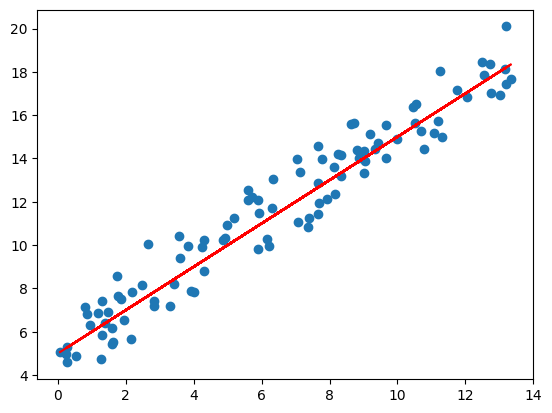

In [22]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ coeff_exact, color="red")

## Initialize parameters

In [12]:
np.random.randn(2)
np.random.seed(0)

In [15]:
def initialize_params(dim =2):
    np.random.seed(0)
    return np.random.randn(2)

In [19]:
params = initialize_params()
params

array([1.76405235, 0.40015721])

### Define a Loss / Cost Function

In [26]:
def MSE(x,y,params):
    return jnp.sqrt(jnp.sum(jnp.square(y - x @ params)))
''' 
y: target
x: input 
params: learned parameters by the model
the model y_hat = X @ params is of course made by the params found
We compute the loss wrt the params found
'''

grad_jit = jax.jit(jax.grad(MSE, argnums=2)) # inform jax to compute grad wrt parameters
''' 
it will be useful when we need to compute the gradient of the loss function
at each epoch of the gradient descent itertive method
'''
MSE_jit = jax.jit(MSE) # just a compile option to speed up computation

In [ ]:
np.random.seed(0)
params = np.random.randn(2)

max_epochs = 5000
learning_rate = 0.01
batch_size = 10

for epoch in range(max_epochs):
    batch_idxs = np.random.choice(m, batch_size)
    grads = grad_jit(X[batch_idxs, :], y[batch_idxs], params)
    params -= learning_rate * grads

params